# Individual Project

### Importing and understanding data

In [478]:
import pandas as pd
import numpy as np

# Read kickstarter excel file
df = pd.read_excel('/Users/jiajue/Documents/McGill/Fall Term/INSY662/Assignment/Kickstarter_finalproject.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,main_category,staff_pick.1,show_feature_image,video
0,22292,Golgotha - A Feature Film,5500,5530.0,successful,False,US,USD,2017-07-09 04:59:00,2017-07-09 04:59:01,2011-02-01 23:25:17,2017-06-03 16:05:54,False,30,1.0,5530.0,Thrillers,True,4,3,22,20,Sunday,Sunday,Tuesday,Saturday,7,9,2017,4,7,9,2017,4,2,1,2011,23,6,3,2017,16,Film & Video,False,False,True
1,82234,Vinca is opening a storefront!,10000,11045.0,successful,False,US,USD,2018-10-25 14:29:30,2018-10-25 14:29:32,2012-02-28 21:10:07,2018-09-25 14:29:30,False,132,1.0,11045.0,Jewelry,True,5,4,25,23,Thursday,Thursday,Tuesday,Tuesday,10,25,2018,14,10,25,2018,14,2,28,2012,21,9,25,2018,14,Fashion,False,False,True
2,86478,The next Paul Jacobsen & The Madison Arm album!,8500,10556.0,successful,False,US,USD,2019-05-05 16:37:46,2019-05-05 16:37:46,2012-03-01 22:06:25,2019-04-05 16:37:46,False,152,1.0,10556.0,Country & Folk,True,8,6,16,13,Sunday,Sunday,Thursday,Friday,5,5,2019,16,5,5,2019,16,3,1,2012,22,4,5,2019,16,Music,False,False,True
3,127446,Erin Heist First Full-Length Album,5000,5816.0,successful,False,US,USD,2021-11-25 21:00:14,2021-11-25 21:00:14,2012-04-03 22:44:17,2021-10-26 20:00:14,False,86,1.0,5816.0,Country & Folk,True,5,5,15,14,Thursday,Thursday,Tuesday,Tuesday,11,25,2021,21,11,25,2021,21,4,3,2012,22,10,26,2021,20,Music,False,False,True
4,151612,Earth Day Heritage: A Celebration in Music and...,15000,2361.0,failed,False,US,USD,2021-04-15 21:22:00,2021-04-15 21:22:00,2012-04-20 21:06:46,2021-03-15 19:42:17,False,40,1.0,2361.0,Classical Music,False,10,9,19,18,Thursday,Thursday,Friday,Monday,4,15,2021,21,4,15,2021,21,4,20,2012,21,3,15,2021,19,Music,False,False,True


### Pre-processing data

In [479]:
# Examine presence of null values and data type of each column
df.dropna(inplace=True) # no null values exist
df.info()

# Examine unique values for state column
df['state'].value_counts()

# Drop rows with values other than 'successful' or 'failed'
df = df[df['state'].isin(['successful','failed'])]
# Verify state column only contains 'successful' or 'failed'
df['state'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 14937 entries, 0 to 15214
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        14937 non-null  int64         
 1   name                      14937 non-null  object        
 2   goal                      14937 non-null  int64         
 3   pledged                   14937 non-null  float64       
 4   state                     14937 non-null  object        
 5   disable_communication     14937 non-null  bool          
 6   country                   14937 non-null  object        
 7   currency                  14937 non-null  object        
 8   deadline                  14937 non-null  datetime64[ns]
 9   state_changed_at          14937 non-null  datetime64[ns]
 10  created_at                14937 non-null  datetime64[ns]
 11  launched_at               14937 non-null  datetime64[ns]
 12  staff_pick             

state
successful    8087
failed        6098
Name: count, dtype: int64

In [480]:
# Specify irrelevant columns to drop
irrelevant_cols = ['id', 'name', 'pledged', 'backers_count', 'usd_pledged','name_len', 'blurb_len', 'state_changed_at', 'state_changed_at_weekday', 'created_at_weekday', 'deadline_day', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_day','launched_at_hr']
df = df.drop(irrelevant_cols, axis=1)

# Rename some column for easier reference
df = df.rename(columns={'staff_pick.1': 'proj_we_love_page'})
df.head(10)

,goal,state,disable_communication,country,currency,deadline,created_at,launched_at,staff_pick,static_usd_rate,category,spotlight,name_len_clean,blurb_len_clean,deadline_weekday,launched_at_weekday,deadline_month,deadline_yr,created_at_yr,launched_at_month,launched_at_yr,main_category,proj_we_love_page,show_feature_image,video
0,5500,successful,False,US,USD,2017-07-09 04:59:00,2011-02-01 23:25:17,2017-06-03 16:05:54,False,1.0,Thrillers,True,3,20,Sunday,Saturday,7,2017,2011,6,2017,Film & Video,False,False,True
1,10000,successful,False,US,USD,2018-10-25 14:29:30,2012-02-28 21:10:07,2018-09-25 14:29:30,False,1.0,Jewelry,True,4,23,Thursday,Tuesday,10,2018,2012,9,2018,Fashion,False,False,True
2,8500,successful,False,US,USD,2019-05-05 16:37:46,2012-03-01 22:06:25,2019-04-05 16:37:46,False,1.0,Country & Folk,True,6,13,Sunday,Friday,5,2019,2012,4,2019,Music,False,False,True
3,5000,successful,False,US,USD,2021-11-25 21:00:14,2012-04-03 22:44:17,2021-10-26 20:00:14,False,1.0,Country & Folk,True,5,14,Thursday,Tuesday,11,2021,2012,10,2021,Music,False,False,True
4,15000,failed,False,US,USD,2021-04-15 21:22:00,2012-04-20 21:06:46,2021-03-15 19:42:17,False,1.0,Classical Music,False,9,18,Thursday,Monday,4,2021,2012,3,2021,Music,False,False,True
5,2000,successful,False,US,USD,2017-10-03 12:14:49,2012-06-01 18:35:12,2017-08-15 12:14:49,False,1.0,Rock,True,7,20,Tuesday,Tuesday,10,2017,2012,8,2017,Music,False,False,True
6,5000,failed,False,US,USD,2019-08-19 16:00:00,2012-07-03 08:25:12,2019-06-25 10:50:52,False,1.0,Audio,False,9,16,Monday,Tuesday,8,2019,2012,6,2019,Journalism,False,False,True
7,2500,successful,False,US,USD,2023-04-29 09:54:25,2012-07-19 20:05:31,2023-03-24 09:54:25,False,1.0,Software,True,6,16,Saturday,Friday,4,2023,2012,3,2023,Technology,False,False,True
8,5000,successful,False,US,USD,2020-07-10 04:59:00,2012-08-22 22:46:42,2020-06-09 01:27:54,False,1.0,Faith,True,8,12,Friday,Tuesday,7,2020,2012,6,2020,Music,False,False,True
9,500,successful,False,US,USD,2019-10-24 04:00:00,2012-08-30 16:38:21,2019-09-18 12:00:38,False,1.0,Graphic Design,True,4,14,Thursday,Wednesday,10,2019,2012,9,2019,Design,False,False,False


In [481]:
# Examine boolean variables
for i in ['disable_communication', 'staff_pick', 'spotlight','proj_we_love_page','show_feature_image','video']:
    print('Examine', i)
    print(df[i].value_counts())
    print(df.groupby('state')[i].value_counts(), '\n')

# Drop columns that are univariate/ associated with state based on training set (100% correlated) though in reality may not be the case but existing dataset does not provide further information
df.drop(columns=['disable_communication', 'spotlight', 'proj_we_love_page'], inplace=True)

Examine disable_communication
disable_communication
False    14185
Name: count, dtype: int64
state       disable_communication
failed      False                    6098
successful  False                    8087
Name: count, dtype: int64 

Examine staff_pick
staff_pick
False    12171
True      2014
Name: count, dtype: int64
state       staff_pick
failed      False         5928
            True           170
successful  False         6243
            True          1844
Name: count, dtype: int64 

Examine spotlight
spotlight
True     8087
False    6098
Name: count, dtype: int64
state       spotlight
failed      False        6098
successful  True         8087
Name: count, dtype: int64 

Examine proj_we_love_page
proj_we_love_page
False    14185
Name: count, dtype: int64
state       proj_we_love_page
failed      False                6098
successful  False                8087
Name: count, dtype: int64 

Examine show_feature_image
show_feature_image
False    13720
True       465
Name: count, 

In [482]:
# Drop show feature image variable as all failed projects do not have an image which may not always be the case - potentially biased
df.drop(columns=['show_feature_image'], inplace=True)

# Will also drop staff pick as it is uncertain if this is decide before launch/during launch or after the campaign 
df.drop(columns=['staff_pick'], inplace=True)

In [483]:
### Time based features

# Calculating campaign duration
df['campaign_dur'] = (df['deadline'] - df['launched_at']).dt.days

# Ensuring campaign period is within 1-60 days ie the duration specified on the website
df['campaign_dur'].value_counts().sort_index(ascending=False) # total of 5 erroneous data
# Filter out obs with duration > 60 days, and ensuring that invalid data not retained
df = df[(df['campaign_dur']<=60) & (df['campaign_dur']>=0)] 

# Calculate duration between creation and launch
df['creation_to_launch'] = (df['launched_at'] - df['created_at']).dt.days

# Dropping original launched at and created at columns
df = df.drop(['launched_at', 'created_at', 'deadline'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14180 entries, 0 to 15214
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goal                 14180 non-null  int64  
 1   state                14180 non-null  object 
 2   country              14180 non-null  object 
 3   currency             14180 non-null  object 
 4   static_usd_rate      14180 non-null  float64
 5   category             14180 non-null  object 
 6   name_len_clean       14180 non-null  int64  
 7   blurb_len_clean      14180 non-null  int64  
 8   deadline_weekday     14180 non-null  object 
 9   launched_at_weekday  14180 non-null  object 
 10  deadline_month       14180 non-null  int64  
 11  deadline_yr          14180 non-null  int64  
 12  created_at_yr        14180 non-null  int64  
 13  launched_at_month    14180 non-null  int64  
 14  launched_at_yr       14180 non-null  int64  
 15  main_category        14180 non-null  obje

In [484]:
### Goal related features

# Scaling goal amount into USD
df['goal_usd'] = df['goal'] * df['static_usd_rate']

# Drop original goal and pledged columns, along with static usd rate & currency
df = df.drop(['goal', 'static_usd_rate', 'currency'], axis=1)

# Creating new column avg goal per day
df['avg_goal_day'] = df['goal_usd']/df['campaign_dur']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14180 entries, 0 to 15214
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                14180 non-null  object 
 1   country              14180 non-null  object 
 2   category             14180 non-null  object 
 3   name_len_clean       14180 non-null  int64  
 4   blurb_len_clean      14180 non-null  int64  
 5   deadline_weekday     14180 non-null  object 
 6   launched_at_weekday  14180 non-null  object 
 7   deadline_month       14180 non-null  int64  
 8   deadline_yr          14180 non-null  int64  
 9   created_at_yr        14180 non-null  int64  
 10  launched_at_month    14180 non-null  int64  
 11  launched_at_yr       14180 non-null  int64  
 12  main_category        14180 non-null  object 
 13  video                14180 non-null  bool   
 14  campaign_dur         14180 non-null  int64  
 15  creation_to_launch   14180 non-null  int6

In [485]:
# Examine country variable
print(df['country'].value_counts())
print(df['country'].value_counts(normalize=True)*100)
print(df['country'].value_counts(normalize=True).cumsum())
df['country'].nunique()

country
US    8286
GB    1749
CA     686
MX     448
DE     344
AU     329
FR     311
IT     279
ES     268
HK     156
NL     134
SE     127
JP     126
SG      92
DK      69
CH      68
BE      61
NZ      59
IE      54
AT      50
PL      38
NO      34
UA      32
GR      25
CN      23
KR      18
CO      16
IN      14
PR      12
TH      11
VN      11
IL      10
HR       9
RU       8
LU       8
ID       7
TW       7
HU       7
PE       7
CR       7
SI       6
KE       6
PT       6
NG       6
EC       5
GH       5
CZ       5
ZA       5
PH       5
CU       5
AR       5
IS       4
RS       4
BR       4
JM       4
CY       3
FI       3
ET       3
UG       3
MA       3
AE       3
EE       3
LT       3
TR       3
BA       3
BS       3
VE       3
NP       3
IQ       3
BT       2
AM       2
PK       2
RO       2
BO       2
MT       2
LB       2
SL       2
HN       2
AF       2
MN       2
SN       2
SV       2
BG       2
NI       2
SJ       2
MY       2
TZ       2
GU       1
TV       1
KG       1
PA

114

In [486]:
# Examine country column by calculating % distribution of values
country_distribution = df['country'].value_counts()
threshold = len(df) * 0.01
country_replace = country_distribution[country_distribution < threshold].index
df['country'] = df['country'].replace(country_replace, 'Others')
df['country'].value_counts(normalize=True)*100

# Dummify country
df = pd.get_dummies(df, columns=['country'], drop_first=True)

In [487]:
# Understanding category
df['category'].value_counts(normalize=True).cumsum()


category
Web                   0.031594
Photobooks            0.057828
Accessories           0.083780
Drinks                0.107405
Apparel               0.130536
Shorts                0.151763
Children's Books      0.172920
Restaurants           0.193159
Documentary           0.212623
Digital Art           0.231664
Country & Folk        0.250494
Anthologies           0.268336
Apps                  0.285543
Playing Cards         0.301834
Animation             0.318054
Mixed Media           0.334274
Horror                0.350000
Painting              0.365374
Mobile Games          0.379831
Graphic Design        0.394217
Art Books             0.408322
Rock                  0.422003
Small Batch           0.435543
DIY                   0.449083
Jewelry               0.462623
Nonfiction            0.475458
Food Trucks           0.488223
Footwear              0.500705
Drama                 0.512412
Classical Music       0.523907
Wearables             0.534979
Hip-Hop               0.545980

In [488]:
# Converting weekday columns into numerals
#df['launched_at_weekday'] = df['launched_at_weekday'].apply(lambda x: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(x))
#df['deadline_weekday'] = df['deadline_weekday'].apply(lambda x: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(x))
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14180 entries, 0 to 15214
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                14180 non-null  object 
 1   category             14180 non-null  object 
 2   name_len_clean       14180 non-null  int64  
 3   blurb_len_clean      14180 non-null  int64  
 4   deadline_weekday     14180 non-null  object 
 5   launched_at_weekday  14180 non-null  object 
 6   deadline_month       14180 non-null  int64  
 7   deadline_yr          14180 non-null  int64  
 8   created_at_yr        14180 non-null  int64  
 9   launched_at_month    14180 non-null  int64  
 10  launched_at_yr       14180 non-null  int64  
 11  main_category        14180 non-null  object 
 12  video                14180 non-null  bool   
 13  campaign_dur         14180 non-null  int64  
 14  creation_to_launch   14180 non-null  int64  
 15  goal_usd             14180 non-null  floa

In [489]:
df['main_category'].value_counts(normalize=True).cumsum()
#df['category_main_category'] = df['main_category'] + '_' + df['category']
#df['category_main_category'].value_counts(normalize=True).cumsum()

main_category
Film & Video    0.143794
Publishing      0.264034
Music           0.377292
Art             0.480889
Food            0.583498
Fashion         0.672990
Technology      0.754584
Games           0.811707
Crafts          0.861072
Photography     0.907052
Design          0.941467
Journalism      0.969676
Theater         0.982863
Comics          0.992807
Dance           1.000000
Name: proportion, dtype: float64

In [490]:
# Construct variables 
x = df.drop(columns='state')
y = df['state'].apply(lambda x: 1 if x == 'successful' else 0)

x = pd.DataFrame(x, columns=x.columns)
x.describe()

,name_len_clean,blurb_len_clean,deadline_month,deadline_yr,created_at_yr,launched_at_month,launched_at_yr,campaign_dur,creation_to_launch,goal_usd,avg_goal_day
count,14180.000000,14180.000000,14180.000000,14180.000000,14180.000000,14180.000000,14180.000000,14180.000000,14180.000000,1.418000e+04,1.418000e+04
mean,5.003667,14.994852,6.597250,2019.590197,2019.337094,6.276939,2019.524401,33.715444,65.743653,4.600348e+04,1.167813e+03
std,2.284353,5.449695,3.384174,1.905327,1.893912,3.401226,1.890779,12.963687,206.582746,1.450208e+06,3.024201e+04
min,1.000000,1.000000,1.000000,2017.000000,2011.000000,1.000000,2017.000000,1.000000,0.000000,7.603898e-01,1.311017e-02
25%,3.000000,11.000000,4.000000,2018.000000,2018.000000,3.000000,2018.000000,29.000000,4.000000,1.373339e+03,4.666667e+01
50%,5.000000,16.000000,7.000000,2020.000000,2019.000000,6.000000,2019.000000,30.000000,14.000000,5.000000e+03,1.527978e+02
75%,7.000000,19.000000,10.000000,2021.000000,2021.000000,9.000000,2021.000000,37.000000,45.000000,1.300000e+04,4.137931e+02
max,14.000000,28.000000,12.000000,2024.000000,2022.000000,12.000000,2024.000000,60.000000,3899.000000,1.182690e+08,2.538462e+06


In [491]:
# Check for collinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd
x_vifcheck = x.select_dtypes(include=['float64', 'int64'])

x_vifcheck = sm.add_constant(x_vifcheck)
vif = pd.DataFrame()
vif['Feature'] = x_vifcheck.columns
vif['VIF'] = [variance_inflation_factor(x_vifcheck.values, i) for i in range(x_vifcheck.shape[1])]

print(vif.sort_values(by='VIF', ascending=False))

               Feature           VIF
0                const  1.257878e+06
4          deadline_yr  5.026845e+03
7       launched_at_yr  4.962184e+03
3       deadline_month  1.112015e+02
6    launched_at_month  1.106939e+02
5        created_at_yr  6.745092e+01
10            goal_usd  1.215512e+01
11        avg_goal_day  1.215186e+01
9   creation_to_launch  6.994945e+00
8         campaign_dur  2.776518e+00
2      blurb_len_clean  1.113215e+00
1       name_len_clean  1.045690e+00


In [492]:
# Investigating deadline year, created year, launched at year and state
print(df.groupby('state')['deadline_yr'].value_counts().sort_index())
print(df.groupby('state')['created_at_yr'].value_counts().sort_index())
print(df.groupby('state')['launched_at_yr'].value_counts().sort_index())
print(df.groupby('state')['creation_to_launch'].value_counts().sort_index())
print(df.groupby('state')['campaign_dur'].value_counts().sort_index())

state       deadline_yr
failed      2017           1418
            2018           1168
            2019            972
            2020            799
            2021            767
            2022            814
            2023            152
            2024              6
successful  2017           1303
            2018           1139
            2019           1053
            2020           1144
            2021           1309
            2022           1650
            2023            437
            2024             49
Name: count, dtype: int64
state       created_at_yr
failed      2012                3
            2013                7
            2014                8
            2015               28
            2016              139
            2017             1488
            2018             1098
            2019              981
            2020              781
            2021              769
            2022              794
successful  2011                1
    

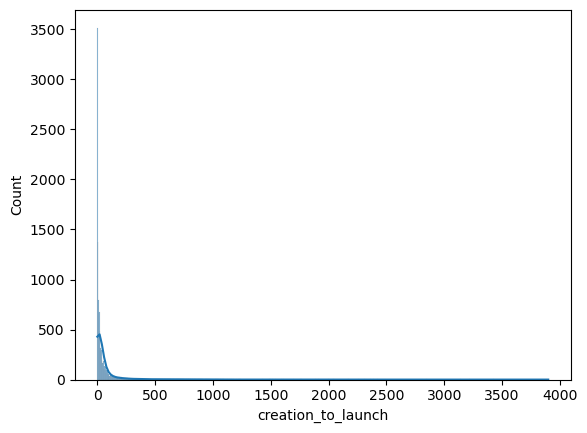

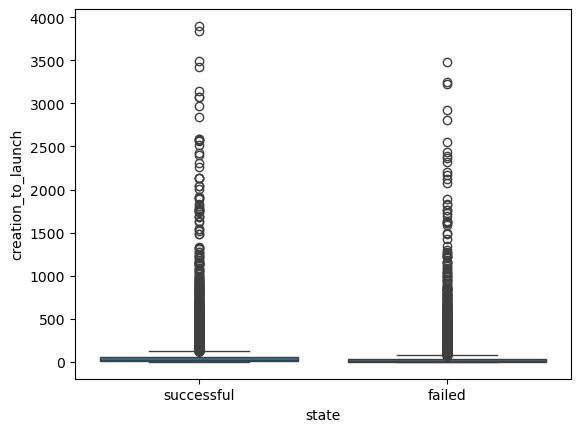

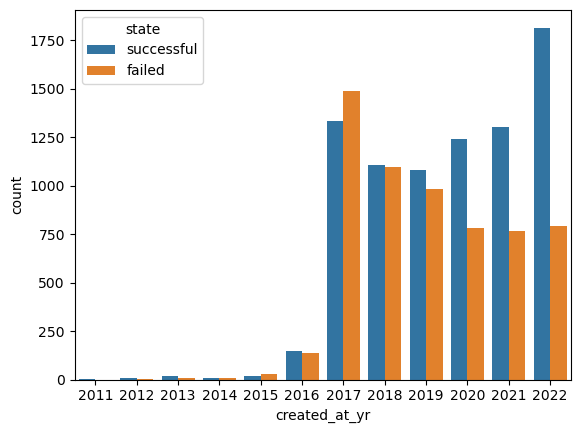

In [493]:
# Examine creation_to_launch
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of creation_to_launch
sns.histplot(df['creation_to_launch'], kde=True)
plt.show()

# Relationship between creation_to_launch and state
sns.boxplot(x=df['state'], y=df['creation_to_launch'])
plt.show()

# Distribution of created_at_yr
sns.countplot(x=df['created_at_yr'], hue=df['state'])
plt.show()

In [494]:
# Examine correlation between creation to launch and created at with target variable
df['state'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0)

# Scale creation to launch
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['creation_to_launch_scaled'] = scaler.fit_transform(df[['creation_to_launch']])
corr_creation = df[['creation_to_launch_scaled', 'created_at_yr']].corrwith(df['state'])
print(corr_creation)

# Consider dropping creation to launch since as created at yr has a stronger correlation but let's observe how corr changes with other vars removed first

creation_to_launch_scaled    0.040791
created_at_yr                0.154943
dtype: float64


In [495]:
# Examine r/s between launched at/deadline month and target
corr_month = df[['launched_at_month', 'deadline_month']].corrwith(df['state'])
corr_month

launched_at_month   -0.018378
deadline_month      -0.004259
dtype: float64

In [496]:
# Examine r/s between launched at/ deadline year and target
corr_yr = df[['launched_at_yr', 'deadline_yr']].corrwith(df['state'])
corr_yr

launched_at_yr    0.171460
deadline_yr       0.163653
dtype: float64

In [497]:
# Examine r/s between goal and avg goal/day and target
corr_goal = df[['goal_usd', 'avg_goal_day']].corrwith(df['state'])
corr_goal

goal_usd       -0.030381
avg_goal_day   -0.034692
dtype: float64

In [498]:
# Drop collinear variables
df = df.drop(columns=['goal_usd', 'deadline_yr', 'deadline_month', 'creation_to_launch_scaled'])

In [499]:
# Check for collinearity again
x = df.drop(columns=['state'])
x_vifcheck = x.select_dtypes(include=['float64', 'int64'])

x_vifcheck = sm.add_constant(x_vifcheck)
vif = pd.DataFrame()
vif['Feature'] = x_vifcheck.columns
vif['VIF'] = [variance_inflation_factor(x_vifcheck.values, i) for i in range(x_vifcheck.shape[1])]

print(vif.sort_values(by='VIF', ascending=False))

              Feature           VIF
0               const  1.256460e+06
3       created_at_yr  6.640894e+01
5      launched_at_yr  6.578737e+01
7  creation_to_launch  6.891002e+00
4   launched_at_month  1.239523e+00
2     blurb_len_clean  1.113170e+00
1      name_len_clean  1.045283e+00
6        campaign_dur  1.008488e+00
8        avg_goal_day  1.000978e+00


In [500]:
# Examine r/s between created at yr vs launched at yr with target
corr_yr = df[['launched_at_yr', 'created_at_yr']].corrwith(df['state'])
corr_yr

launched_at_yr    0.171460
created_at_yr     0.154943
dtype: float64

In [501]:
# Drop collinear var again and assess collinearity
df.drop(columns=['created_at_yr'], inplace=True)
x = x.drop(columns=['created_at_yr'])
x_vifcheck = x.select_dtypes(include=['float64', 'int64'])

x_vifcheck = sm.add_constant(x_vifcheck)
vif = pd.DataFrame()
vif['Feature'] = x_vifcheck.columns
vif['VIF'] = [variance_inflation_factor(x_vifcheck.values, i) for i in range(x_vifcheck.shape[1])]

print(vif.sort_values(by='VIF', ascending=False))

              Feature           VIF
0               const  1.246903e+06
2     blurb_len_clean  1.113048e+00
4      launched_at_yr  1.091782e+00
1      name_len_clean  1.045158e+00
6  creation_to_launch  1.021236e+00
5        campaign_dur  1.008432e+00
3   launched_at_month  1.003558e+00
7        avg_goal_day  1.000970e+00


In [502]:
x = pd.DataFrame(x)
x.info()
y.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14180 entries, 0 to 15214
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             14180 non-null  object 
 1   name_len_clean       14180 non-null  int64  
 2   blurb_len_clean      14180 non-null  int64  
 3   deadline_weekday     14180 non-null  object 
 4   launched_at_weekday  14180 non-null  object 
 5   launched_at_month    14180 non-null  int64  
 6   launched_at_yr       14180 non-null  int64  
 7   main_category        14180 non-null  object 
 8   video                14180 non-null  bool   
 9   campaign_dur         14180 non-null  int64  
 10  creation_to_launch   14180 non-null  int64  
 11  avg_goal_day         14180 non-null  float64
 12  country_CA           14180 non-null  bool   
 13  country_DE           14180 non-null  bool   
 14  country_ES           14180 non-null  bool   
 15  country_FR           14180 non-null  bool

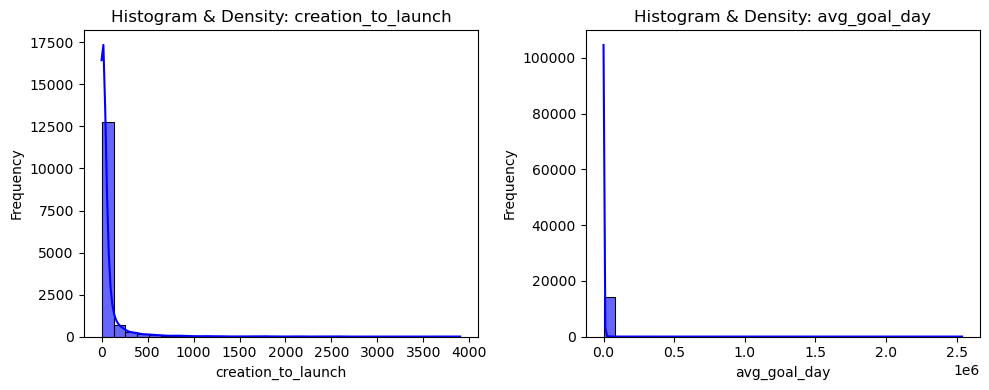

In [503]:
# Visualising skew of goal & creation to launch
cols_to_visual = ['creation_to_launch', 'avg_goal_day']

# Set up the plotting area
plt.figure(figsize=(10, 4))

# Loop through columns to create histograms and density plots
for i, col in enumerate(cols_to_visual, 1):
    plt.subplot(1, len(cols_to_visual), i)
    sns.histplot(df[col], kde=True, bins=30, color='blue', alpha=0.6)  # Histogram with density plot
    plt.title(f'Histogram & Density: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [504]:
# Apply log transformation to address skewness
# Apply log1p transformation to handle zero values
for col in cols_to_visual:
    if (df[col] < 0).any():
        print(f"Column {col} contains negative values, log transformation skipped.")
    else:
        # Apply log1p transformation (log(1+x) handles 0 and small positive values)
        df[f'log1p_{col}'] = np.log1p(df[col])

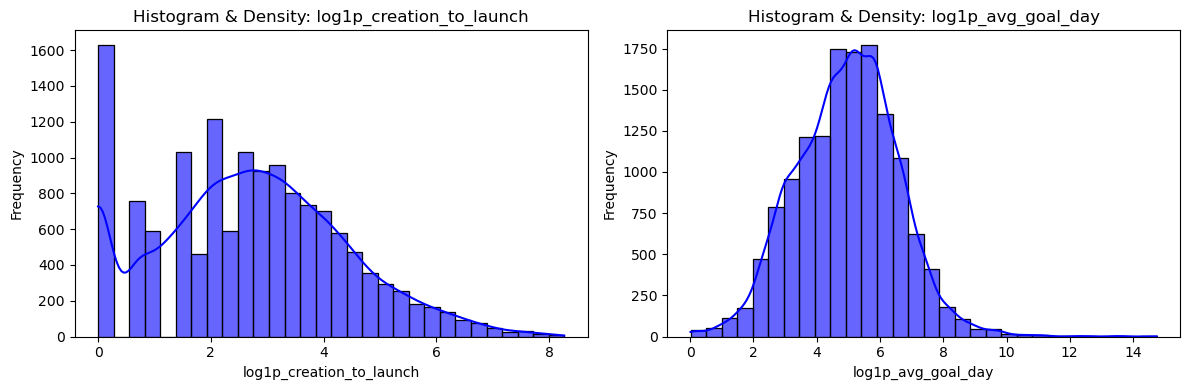

In [505]:
# Plot change after log
logcols_to_visual = ['log1p_creation_to_launch', 'log1p_avg_goal_day']

# Set up the plotting area
plt.figure(figsize=(12, 4))

# Loop through columns to create histograms and density plots
for i, col in enumerate(logcols_to_visual, 1):
    plt.subplot(1, len(logcols_to_visual), i)
    sns.histplot(df[col], kde=True, bins=30, color='blue', alpha=0.6)  # Histogram with density plot
    plt.title(f'Histogram & Density: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [506]:
df.drop(columns=['creation_to_launch','avg_goal_day'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14180 entries, 0 to 15214
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     14180 non-null  int64  
 1   category                  14180 non-null  object 
 2   name_len_clean            14180 non-null  int64  
 3   blurb_len_clean           14180 non-null  int64  
 4   deadline_weekday          14180 non-null  object 
 5   launched_at_weekday       14180 non-null  object 
 6   launched_at_month         14180 non-null  int64  
 7   launched_at_yr            14180 non-null  int64  
 8   main_category             14180 non-null  object 
 9   video                     14180 non-null  bool   
 10  campaign_dur              14180 non-null  int64  
 11  country_CA                14180 non-null  bool   
 12  country_DE                14180 non-null  bool   
 13  country_ES                14180 non-null  bool   
 14  country_FR 

In [507]:
# Detect outliers
from sklearn.ensemble import IsolationForest

# Select numerical columns (int and float)
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
numerical_cols = scaler.fit_transform(numerical_cols)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=0)  # Adjust 'contamination' based on expected % of outliers

# Fit the model
iso_forest.fit(numerical_cols)

# Predict anomalies: -1 indicates an outlier, 1 indicates inlier
outlier_predictions = iso_forest.predict(numerical_cols)

# Add the predictions as a new column in the dataframe
df['is_outlier'] = outlier_predictions

# Filter outliers
outliers = df[df['is_outlier'] == -1]
inliers = df[df['is_outlier'] == 1]

# Print summary
print("Number of outliers detected:", len(outliers))
print("Number of inliers detected:", len(inliers))

Number of outliers detected: 709
Number of inliers detected: 13471


In [508]:
# Remove outliers (5% of data)
df = df[df['is_outlier'] != -1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13471 entries, 0 to 15213
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     13471 non-null  int64  
 1   category                  13471 non-null  object 
 2   name_len_clean            13471 non-null  int64  
 3   blurb_len_clean           13471 non-null  int64  
 4   deadline_weekday          13471 non-null  object 
 5   launched_at_weekday       13471 non-null  object 
 6   launched_at_month         13471 non-null  int64  
 7   launched_at_yr            13471 non-null  int64  
 8   main_category             13471 non-null  object 
 9   video                     13471 non-null  bool   
 10  campaign_dur              13471 non-null  int64  
 11  country_CA                13471 non-null  bool   
 12  country_DE                13471 non-null  bool   
 13  country_ES                13471 non-null  bool   
 14  country_FR 

In [509]:
# Dummy code the 'main_category' and other categorical columns
df_dummies = pd.get_dummies(df[['main_category']], drop_first=True)

# Combine the dummy variables with the target 'state' column
df_combined = pd.concat([df_dummies, df['state']], axis=1)

# Calculate the correlation of all dummy variables with 'state'
correlations = df_combined.corr()['state']

# Print out the correlations
print(correlations.sort_values(ascending=False))

print(df['main_category'].value_counts(normalize=True))

state                         1.000000
main_category_Publishing      0.121332
main_category_Music           0.083953
main_category_Fashion         0.078218
main_category_Comics          0.073104
main_category_Dance           0.057488
main_category_Games           0.035752
main_category_Film & Video    0.031825
main_category_Photography     0.029796
main_category_Theater        -0.011209
main_category_Crafts         -0.041022
main_category_Design         -0.046115
main_category_Journalism     -0.085225
main_category_Technology     -0.119578
main_category_Food           -0.188108
Name: state, dtype: float64
main_category
Film & Video    0.143568
Publishing      0.121595
Music           0.112093
Art             0.103185
Food            0.102220
Fashion         0.092272
Technology      0.079875
Games           0.056269
Crafts          0.049217
Photography     0.047064
Design          0.033702
Journalism      0.028135
Theater         0.013065
Comics          0.010318
Dance           0.00742

In [510]:
# Correlation between subcategory and state
df_cat_dummy = pd.get_dummies(df[['category']], drop_first=True)
df_test = pd.concat([df_cat_dummy, df['state']], axis=1)
print(df['category'].value_counts(normalize=True))
df_test.corr()['state'].sort_values(ascending=False)

category
Web                   0.031252
Accessories           0.027244
Photobooks            0.027095
Apparel               0.023977
Drinks                0.023532
Shorts                0.022047
Children's Books      0.021750
Documentary           0.020488
Restaurants           0.020266
Country & Folk        0.019523
Digital Art           0.018558
Anthologies           0.018410
Playing Cards         0.016703
Mixed Media           0.016554
Animation             0.016034
Apps                  0.015960
Horror                0.015218
Painting              0.014995
Art Books             0.014550
Graphic Design        0.014550
Jewelry               0.013733
Rock                  0.013585
Mobile Games          0.013436
Small Batch           0.013362
DIY                   0.013214
Nonfiction            0.013065
Food Trucks           0.012842
Footwear              0.012842
Drama                 0.011655
Classical Music       0.011506
Electronic Music      0.010838
Wearables             0.010690

state                          1.000000
category_Accessories           0.141786
category_Apparel               0.132793
category_Shorts                0.127210
category_Children's Books      0.126331
category_Documentary           0.122533
category_Country & Folk        0.119553
category_Playing Cards         0.110421
category_Art Books             0.102947
category_Rock                  0.099426
category_Nonfiction            0.097480
category_Video Games           0.085878
category_Illustration          0.082653
category_Fiction               0.079984
category_Anthologies           0.074601
category_Indie Rock            0.067911
category_Narrative Film        0.066709
category_Performances          0.058075
category_Photobooks            0.054248
category_Gadgets               0.041985
category_Fine Art              0.038639
category_Product Design        0.033477
category_Drama                 0.028895
category_Hardware              0.027327
category_Metal                 0.027285


In [511]:
# Will leave RF to decide between category and main category. Will dummify for now
# Weekdays and months are more categorical vars rather than continuous as well, thus will dummify
df = pd.get_dummies(df, columns=['category', 'main_category', 'launched_at_weekday', 'deadline_weekday', 'launched_at_month'], drop_first=True)
df.drop('is_outlier', inplace=True, axis=1)
x = df.drop('state', axis=1)
y = df['state']

### Develop a classification model to predict state

In [512]:
# Feature selection using RF
# Implement standardisation for certain predictors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0, shuffle=True)

cols_standardise = ['name_len_clean', 'blurb_len_clean', 'campaign_dur', 'log1p_avg_goal_day', 'log1p_creation_to_launch']
scaler = StandardScaler()
x_train[cols_standardise] = scaler.fit_transform(x_train[cols_standardise])
x_test[cols_standardise] = scaler.transform(x_test[cols_standardise])

# Initialise RF model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
rf = RandomForestClassifier(random_state=0) #random state for reproducibility
feature_model = rf.fit(x_train, y_train)
y_test_pred=feature_model.predict(x_test)
precision_rf = precision_score(y_test,y_test_pred)
print(pd.Series(feature_model.feature_importances_,index = x.columns).sort_values(ascending = False))
print(precision_rf)

log1p_avg_goal_day               0.104856
log1p_creation_to_launch         0.084148
campaign_dur                     0.073902
blurb_len_clean                  0.052068
launched_at_yr                   0.046356
name_len_clean                   0.042016
video                            0.021947
main_category_Food               0.017425
country_US                       0.012639
category_Documentary             0.011910
category_Apparel                 0.011880
category_Web                     0.011402
category_Shorts                  0.010565
launched_at_weekday_Tuesday      0.009915
category_Accessories             0.009626
launched_at_weekday_Monday       0.009178
deadline_weekday_Sunday          0.008889
main_category_Publishing         0.008849
launched_at_weekday_Wednesday    0.008763
deadline_weekday_Thursday        0.008710
category_Mobile Games            0.008516
main_category_Technology         0.008506
deadline_weekday_Saturday        0.008434
launched_at_weekday_Thursday     0

### Develop a clustering model to group projects

#### Random forest model

In [517]:
# Classification model with Random Forest

# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

# Define the model
rf = RandomForestClassifier(random_state=0)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of the trees
    'min_samples_split': [7, 8, 9, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 3],  # Minimum samples at a leaf node
    'max_features': [8, 9, 10],  # Features to consider for splitting
    'bootstrap': [True, False]  # Whether to use bootstrapping
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=True)

# Fit the model with the training data
grid_search_rf.fit(x_train, y_train)

# Get the best hyperparameters
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Predict on the test set using the best model
y_pred_rf = grid_search_rf.predict(x_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
Random Forest Accuracy: 0.7790697674418605
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1703
           1       0.79      0.84      0.81      2339

    accuracy                           0.78      4042
   macro avg       0.78      0.77      0.77      4042
weighted avg       0.78      0.78      0.78      4042



In [ ]:
# Classification model with Random Forest round 2 tuning

# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

# Define the model
rf = RandomForestClassifier(random_state=0)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [250, 300, 350],  # Number of trees
    'max_depth': [30, 40, None],  # Depth of the trees
    'min_samples_split': [7,8,9],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 3],  # Minimum samples at a leaf node
    'max_features': range(10,15),  # Features to consider for splitting
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=True)

# Fit the model with the training data
grid_search_rf.fit(x_train, y_train)

# Get the best hyperparameters
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Predict on the test set using the best model
y_pred_rf = grid_search_rf.predict(x_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 350}
Random Forest Accuracy: 0.7809120827456512
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1833
           1       0.80      0.83      0.81      2421

    accuracy                           0.78      4254
   macro avg       0.78      0.77      0.78      4254
weighted avg       0.78      0.78      0.78      4254



#### Gradient boosting model

In [520]:
# Gradient boosting method on data including category
from sklearn.ensemble import GradientBoostingClassifier
# Define the model
gb = GradientBoostingClassifier(random_state=0)

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'max_depth': [3, 5, 7, None],  # Maximum depth of trees
    'min_samples_leaf': [2, 3, 4],  # Minimum samples to split a node
    'subsample': [0.6, 0.7, 0.8],  # Fraction of samples used for fitting
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for each split
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=True)

# Fit the model with the training data
grid_search_gb.fit(x_train, y_train)

# Get the best hyperparameters
print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)

# Predict on the test set using the best model
y_pred_gb = grid_search_gb.predict(x_test)

# Evaluate performance
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 300, 'subsample': 0.7}
Gradient Boosting Accuracy: 0.7835230084116774
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1703
           1       0.80      0.83      0.82      2339

    accuracy                           0.78      4042
   macro avg       0.78      0.77      0.78      4042
weighted avg       0.78      0.78      0.78      4042



In [521]:
# Feature importance of GBoost Model
gb_model = grid_search_gb.best_estimator_

# Get feature importance scores
feature_importances = gb_model.feature_importances_

# Create a DataFrame to view feature importance with feature names
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                           Feature  Importance
16              log1p_avg_goal_day    0.158287
4                     campaign_dur    0.112667
15        log1p_creation_to_launch    0.104089
3                            video    0.049162
2                   launched_at_yr    0.047908
49            category_Documentary    0.030558
158             main_category_Food    0.030505
23                category_Apparel    0.024945
145                   category_Web    0.021102
125                category_Shorts    0.020646
90           category_Mobile Games    0.017483
43         category_Country & Folk    0.015831
18            category_Accessories    0.015785
122                  category_Rock    0.015501
34       category_Children's Books    0.015239
0                   name_len_clean    0.015135
26              category_Art Books    0.014084
1                  blurb_len_clean    0.013162
106         category_Playing Cards    0.013109
96             category_Nonfiction    0.011797
24           

#### ANN Testing

In [523]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 100)],  # Tuple for layer sizes
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.001, 0.01, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 500]
}

# Initiate ANN model
mlp = MLPClassifier(random_state=0)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=5, verbose=True)

# Fit GridSearchCV to the training data
grid_result = grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_result.best_params_
best_score = grid_result.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

# Get the best model from GridSearchCV
best_model_ann = grid_result.best_estimator_

# Predict on the test set
y_pred_ann = best_model_ann.predict(x_test)

# Print the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_ann))

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.7808876799873984
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1703
           1       0.58      1.00      0.73      2339

    accuracy                           0.58      4042
   macro avg       0.29      0.50      0.37      4042
weighted avg       0.33      0.58      0.42      4042



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Grading code for predictive model

In [ ]:
grading = pd.read_csv('Kickstarter-Grading.xlsx')

# Remove null values
grading.dropna(inplace=True)

##### Set up initial irrelevant cols 
cols_to_drop = ['id', 'name', 'pledged', 'backers_count', 'usd_pledged','name_len', 'blurb_len', 'state_changed_at', 'state_changed_at_weekday', 'created_at_weekday', 'deadline_day', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_day', 'launched_at_hr', 
 'disable_communication', 'spotlight', 'staff_pick.1', 'show_feature_image', 'staff_pick']

# Drop all irrelevant cols
grading = grading.drop(cols_to_drop, axis=1)

##### Time features: Calculating campaign duration
grading['campaign_dur'] = (grading['deadline'] - grading['launched_at']).dt.days

# Filter out obs with duration > 60 days, and ensuring that invalid data not retained
grading = grading[(grading['campaign_dur']<=60) & (grading['campaign_dur']>=0)] 

# Calculate duration between creation and launch
grading['creation_to_launch'] = (grading['launched_at'] - grading['created_at']).dt.days

# Dropping original launched at and created at columns
grading = grading.drop(['launched_at', 'created_at', 'deadline'], axis=1)

##### Goal features: Scale goal to USD
grading['goal_usd'] = grading['goal'] * grading['static_usd_rate']

# Creating new column avg goal per day
grading['avg_goal_day'] = grading['goal_usd']/grading['campaign_dur']

# Drop original goal and pledged columns, along with static usd rate & currency
grading = grading.drop(['goal', 'static_usd_rate', 'currency'], axis=1)

#### Country
grading['country'] = grading['country'].replace(country_replace, 'Others')

# Dummify country
grading = pd.get_dummies(grading, columns=['country'], drop_first=True)

#### Remove variables that were found to be collinear
grading = grading.drop(columns=['goal_usd', 'deadline_yr', 'deadline_month', 'created_at_yr'])

#### Log transformation
cols_to_log = ['creation_to_launch', 'avg_goal_day']
for col in cols_to_log:
    if (grading[col] < 0).any():
        print(f"Column {col} contains negative values, log transformation skipped.")
    else:
        # Apply log1p transformation (log(1+x) handles 0 and small positive values)
        grading[f'log1p_{col}'] = np.log1p(grading[col])

# Drop original columns
grading = grading.drop(cols_to_log, axis=1)

#### Dummify rest of variables
grading = pd.get_dummies(grading, columns=['category', 'main_category', 'launched_at_weekday', 'deadline_weekday', 'launched_at_month'], drop_first=True)

#### Construct variables & standardisation
x_grade = grading.drop('state', axis=1)

grade_standardise = ['name_len_clean', 'blurb_len_clean', 'campaign_dur', 'log1p_avg_goal_day', 'log1p_creation_to_launch']
scaler = StandardScaler()
x_grade[grade_standardise] = scaler.transform(x_grade[grade_standardise])

grading['state'] = grading['state'].apply(lambda x: 1 if x == 'successful' else 0)
y_grade = grading['state']

#### Apply predictive model
# Predict on the grading set using the best model
y_pred_grade = grid_search_gb.predict(x_grade)

# Evaluate performance
print("Gradient Boosting Accuracy:", accuracy_score(y_grade, y_pred_grade))
print(classification_report(y_grade, y_pred_grade))

### Clustering model

In [533]:
import pandas as pd
import numpy as np

df = pd.read_excel('/Users/jiajue/Documents/McGill/Fall Term/INSY662/Assignment/Kickstarter_finalproject.xlsx')
df.dropna(inplace=True)

In [534]:
# Remove irrelevant/univariate columns
cols_to_drop = ['id', 'name', 'pledged', 'usd_pledged','name_len', 'blurb_len', 'state_changed_at', 'state_changed_at_weekday', 'created_at_weekday', 'deadline_day', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_day', 'launched_at_hr', 'disable_communication', 'staff_pick.1']

df.drop(cols_to_drop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14937 entries, 0 to 15214
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   goal                 14937 non-null  int64         
 1   state                14937 non-null  object        
 2   country              14937 non-null  object        
 3   currency             14937 non-null  object        
 4   deadline             14937 non-null  datetime64[ns]
 5   created_at           14937 non-null  datetime64[ns]
 6   launched_at          14937 non-null  datetime64[ns]
 7   staff_pick           14937 non-null  bool          
 8   backers_count        14937 non-null  int64         
 9   static_usd_rate      14937 non-null  float64       
 10  category             14937 non-null  object        
 11  spotlight            14937 non-null  bool          
 12  name_len_clean       14937 non-null  int64         
 13  blurb_len_clean      14937 non-null 

In [535]:
##### Drop rows with values other than 'successful' or 'failed'
df = df[df['state'].isin(['successful','failed'])]

##### Time features: Calculating campaign duration
df['campaign_dur'] = (df['deadline'] - df['launched_at']).dt.days

# Filter out obs with duration > 60 days, and ensuring that invalid data not retained
df = df[(df['campaign_dur']<=60) & (df['campaign_dur']>=0)] 

# Calculate duration between creation and launch
df['creation_to_launch'] = (df['launched_at'] - df['created_at']).dt.days

# Dropping original launched at and created at columns
df = df.drop(['launched_at', 'created_at', 'deadline'], axis=1)

##### Goal features: Scale goal to USD
df['goal_usd'] = df['goal'] * df['static_usd_rate']

# Creating new column avg goal per day
df['avg_goal_day'] = df['goal_usd']/df['campaign_dur']

# Drop original goal and pledged columns, along with static usd rate & currency
df = df.drop(['goal', 'static_usd_rate', 'currency'], axis=1)

#### Country
country_distribution = df['country'].value_counts()
threshold = len(df) * 0.01
country_replace = country_distribution[country_distribution < threshold].index
df['country'] = df['country'].replace(country_replace, 'Others')

#### Remove variables that were found to be collinear
df = df.drop(columns=['goal_usd', 'deadline_yr', 'deadline_month', 'created_at_yr'])

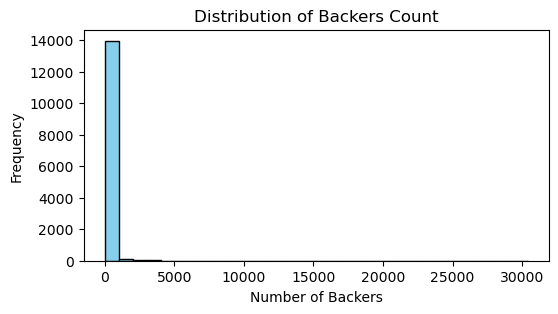

In [536]:
# Visualise backers
plt.figure(figsize=(6, 3))
plt.hist(df['backers_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Backers Count')
plt.xlabel('Number of Backers')
plt.ylabel('Frequency')
plt.show()

In [538]:
#### Log transformation
cols_to_log = ['creation_to_launch', 'avg_goal_day', 'backers_count']
for col in cols_to_log:
    if (df[col] < 0).any():
        print(f"Column {col} contains negative values, log transformation skipped.")
    else:
        # Apply log1p transformation (log(1+x) handles 0 and small positive values)
        df[f'log1p_{col}'] = np.log1p(df[col])

# Drop original columns
df = df.drop(cols_to_log, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14180 entries, 0 to 15214
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     14180 non-null  object 
 1   country                   14180 non-null  object 
 2   staff_pick                14180 non-null  bool   
 3   category                  14180 non-null  object 
 4   spotlight                 14180 non-null  bool   
 5   name_len_clean            14180 non-null  int64  
 6   blurb_len_clean           14180 non-null  int64  
 7   deadline_weekday          14180 non-null  object 
 8   launched_at_weekday       14180 non-null  object 
 9   launched_at_month         14180 non-null  int64  
 10  launched_at_yr            14180 non-null  int64  
 11  main_category             14180 non-null  object 
 12  show_feature_image        14180 non-null  bool   
 13  video                     14180 non-null  bool   
 14  campaign_du

In [539]:
# set up variable for cols to dummify
cols_dummy = ['state', 'country', 'category', 'deadline_weekday','launched_at_weekday', 'launched_at_month', 'main_category']
df_dum = pd.get_dummies(df, columns=cols_dummy, drop_first=True)

# set up variable to standardise
cols_standardise = ['name_len_clean', 'blurb_len_clean', 'launched_at_yr', 'campaign_dur', 'log1p_creation_to_launch', 'log1p_avg_goal_day', 'log1p_backers_count']

In [ ]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Minmax scaling
df_mm = df_dum.copy()
minmax = MinMaxScaler()
df_mm[cols_standardise] = minmax.fit_transform(df_mm[cols_standardise])

In [579]:
# Transforming boolean values into 1 and 0
df_mm = df_mm.applymap(lambda x: 1 if x is True else (0 if x is False else x))

/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_19656/725869730.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mm = df_mm.applymap(lambda x: 1 if x is True else (0 if x is False else x))


### Initial clustering model - KMeans

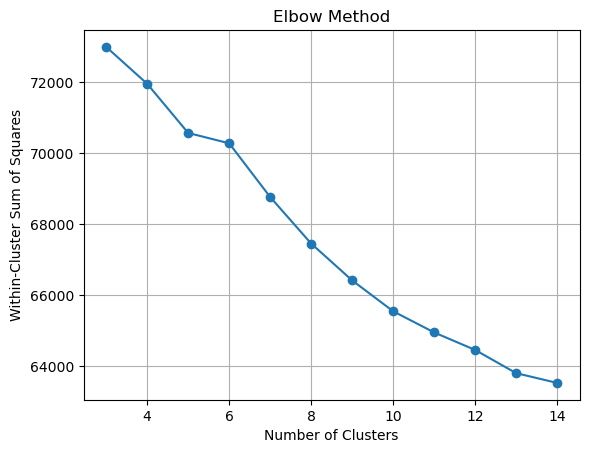

In [547]:
from sklearn.cluster import KMeans
# Elbow method to determine clusters
withins_mm = []
for i in range(3,15):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0) # create kmeans clustering model with i clusters
    model = kmeans.fit(df_mm) 
    withins_mm.append(model.inertia_) # list of within cluster sum of squares ie how tightly packed data points are around their centroids

from matplotlib import pyplot as plt
plt.plot(range(3, 15), withins_mm, marker='o')  # Match x range with clustering range
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.grid(True)
plt.show()

In [580]:
# Silhouette method
# Silhouette method to determine clusters (mm data)
from sklearn.metrics import silhouette_score
for i in range (3,15):    
    kmeans = KMeans(n_clusters=i, n_init='auto')
    model = kmeans.fit(df_mm)
    labels = model.labels_
    print(i,':',silhouette_score(df_mm,labels))

3 : 0.0973071865048488
4 : 0.08493387419754397
5 : 0.07686075718263059
6 : 0.07366969139764824
7 : 0.07031200717193431
8 : 0.08017557572950555
9 : 0.07350407691181624
10 : 0.07018202032764627
11 : 0.07209099992017726
12 : 0.05690531369017222
13 : 0.06949134954943216
14 : 0.06967543480910664


In [587]:
# F-score
from sklearn.metrics import calinski_harabasz_score
for i in range (3,15):    
    kmeans = KMeans(n_clusters=i, n_init='auto')
    model = kmeans.fit(df_mm)
    labels = model.labels_
    score = calinski_harabasz_score(df_mm, labels)
    print(i,'F-score:',score)

3 F-score: 2021.4951428626457
4 F-score: 1694.0925284238654
5 F-score: 1289.3236107155253
6 F-score: 1186.4207658913447
7 F-score: 1059.0798097758534
8 F-score: 922.833209610039
9 F-score: 869.1466470198857
10 F-score: 816.8991699024765
11 F-score: 762.174577791807
12 F-score: 682.6619245875202
13 F-score: 653.7486828662657
14 F-score: 618.8608153163019


### DBSCAN

In [581]:
# Tune DBSCAN parameters (eps and min_samples)
from sklearn.cluster import DBSCAN

eps_values = np.arange(2,10,1)
min_samples_values = [3, 4, 5]
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_mm)
        if len(set(labels)) > 1:  # Avoid single-cluster results
            score = silhouette_score(df_mm, labels)
            print(f"DBSCAN with eps={eps} and min_samples={min_samples} - Silhouette Score: {score}")


DBSCAN with eps=2 and min_samples=3 - Silhouette Score: -0.2102925010495157
DBSCAN with eps=2 and min_samples=4 - Silhouette Score: -0.1878791240317065
DBSCAN with eps=2 and min_samples=5 - Silhouette Score: -0.18878450499019306


### Apply PCA

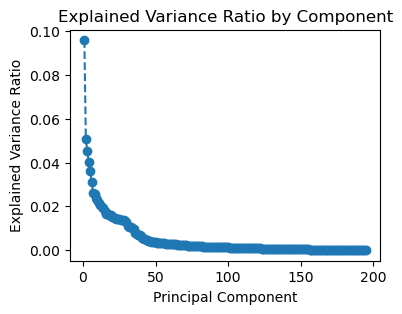

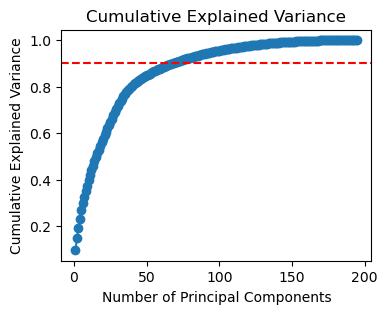

Number of components needed to capture 90.0% variance: 68


In [556]:
from sklearn.decomposition import PCA
# Apply PCA 
pca = PCA()  
pca_result = pca.fit_transform(df_mm)

# Plot the explained variance ratio
plt.figure(figsize=(4, 3))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(4, 3))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  # For example, you may want to capture 90% of the variance
plt.show()

# Identify the number of components that explain at least 90% of the variance
threshold = 0.9
num_components = np.argmax(cumulative_variance >= threshold) + 1  # Adding 1 as index starts from 0
print(f"Number of components needed to capture {threshold*100}% variance: {num_components}")

In [558]:
threshold = 0.7
num_components = np.argmax(cumulative_variance >= threshold) + 1  # Adding 1 as index starts from 0
print(f"Number of components needed to capture {threshold*100}% variance: {num_components}")

threshold = 0.8
num_components = np.argmax(cumulative_variance >= threshold) + 1  # Adding 1 as index starts from 0
print(f"Number of components needed to capture {threshold*100}% variance: {num_components}")

Number of components needed to capture 70.0% variance: 29
Number of components needed to capture 80.0% variance: 40


In [572]:
## Reduce original df into 2 different sets (pca 29 and 40) then run kmeans again, with silhouette score
pca_29 = PCA(n_components=29)
datapca_29 = pca_29.fit_transform(df_mm)

# For PCA 40 components
pca_40 = PCA(n_components=40)
datapca_40 = pca_40.fit_transform(df_mm)

# Function to calculate silhouette scores for different k values
def find_silhouette_score(X_data, min_k=2, max_k=10):
    scores = []
    for k in range(min_k, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=50,random_state=0)
        kmeans.fit(X_data)
        labels = kmeans.labels_
        score = silhouette_score(X_data, labels)
        scores.append((k, score))
    return scores

# Find silhouette scores for both PCA 29 and PCA 40
scores_29 = find_silhouette_score(datapca_29, min_k=2, max_k=15)
scores_40 = find_silhouette_score(datapca_40, min_k=2, max_k=15)

# Print results
print("Silhouette Scores for PCA 29 components:")
for k, score in scores_29:
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

print("\nSilhouette Scores for PCA 40 components:")
for k, score in scores_40:
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

Silhouette Scores for PCA 29 components:
Clusters: 2, Silhouette Score: 0.1293
Clusters: 3, Silhouette Score: 0.0991
Clusters: 4, Silhouette Score: 0.0861
Clusters: 5, Silhouette Score: 0.0831
Clusters: 6, Silhouette Score: 0.0850
Clusters: 7, Silhouette Score: 0.0756
Clusters: 8, Silhouette Score: 0.0852
Clusters: 9, Silhouette Score: 0.0743
Clusters: 10, Silhouette Score: 0.0958
Clusters: 11, Silhouette Score: 0.0821
Clusters: 12, Silhouette Score: 0.0935
Clusters: 13, Silhouette Score: 0.0850
Clusters: 14, Silhouette Score: 0.0867
Clusters: 15, Silhouette Score: 0.1013

Silhouette Scores for PCA 40 components:
Clusters: 2, Silhouette Score: 0.1139
Clusters: 3, Silhouette Score: 0.0857
Clusters: 4, Silhouette Score: 0.0771
Clusters: 5, Silhouette Score: 0.0703
Clusters: 6, Silhouette Score: 0.0574
Clusters: 7, Silhouette Score: 0.0714
Clusters: 8, Silhouette Score: 0.0794
Clusters: 9, Silhouette Score: 0.0655
Clusters: 10, Silhouette Score: 0.0685
Clusters: 11, Silhouette Score: 0.07

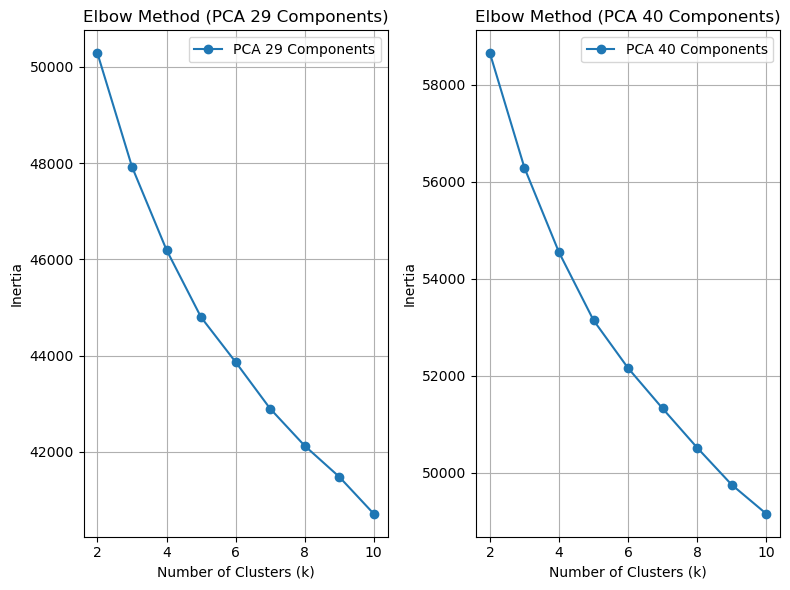

In [563]:
# Elbow method
# Calculate inertia for different k values
def calculate_inertia(X_data, min_k=2, max_k=10):
    inertia_values = []
    for k in range(min_k, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=50, random_state=0)
        kmeans.fit(X_data)
        inertia_values.append((k, kmeans.inertia_))
    return inertia_values

# Calculate inertia for PCA 29 and PCA 40 components
inertia_29 = calculate_inertia(datapca_29, min_k=2, max_k=10)
inertia_40 = calculate_inertia(datapca_40, min_k=2, max_k=10)

# Plot the elbow method for both
import matplotlib.pyplot as plt

# Plot for PCA 29
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot([k for k, _ in inertia_29], [inertia for _, inertia in inertia_29], marker='o', label="PCA 29 Components")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method (PCA 29 Components)")
plt.grid(True)
plt.legend()

# Plot for PCA 40
plt.subplot(1, 2, 2)
plt.plot([k for k, _ in inertia_40], [inertia for _, inertia in inertia_40], marker='o', label="PCA 40 Components")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method (PCA 40 Components)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [564]:
# DBSCAN on PCA sets
# Function to run DBSCAN and calculate silhouette score
def run_dbscan(X_data, eps_values, min_samples_values):
    results = []
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_data)

            # Calculate silhouette score only if more than 1 cluster is found
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                score = silhouette_score(X_data, labels)
                results.append((eps, min_samples, n_clusters, score))
            else:
                results.append((eps, min_samples, n_clusters, None))
    return results

# Define hyperparameters to test
eps_values = [0.5, 0.7, 1.0, 1.2] 
min_samples_values = [3, 5, 10]

# Run DBSCAN on PCA 29
results_29 = run_dbscan(datapca_29, eps_values, min_samples_values)
print("DBSCAN Results for PCA 29 Components:")
for eps, min_samples, n_clusters, score in results_29:
    print(f"EPS: {eps}, Min Samples: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {score}")

# Run DBSCAN on PCA 40
results_40 = run_dbscan(datapca_40, eps_values, min_samples_values)
print("\nDBSCAN Results for PCA 40 Components:")
for eps, min_samples, n_clusters, score in results_40:
    print(f"EPS: {eps}, Min Samples: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {score}")

DBSCAN Results for PCA 29 Components:
EPS: 0.5, Min Samples: 3, Clusters: 697, Silhouette Score: -0.2858522003968081
EPS: 0.5, Min Samples: 5, Clusters: 130, Silhouette Score: -0.357673173857741
EPS: 0.5, Min Samples: 10, Clusters: 4, Silhouette Score: -0.19614347534151483
EPS: 0.7, Min Samples: 3, Clusters: 882, Silhouette Score: -0.24355373946793807
EPS: 0.7, Min Samples: 5, Clusters: 176, Silhouette Score: -0.3550745221354161
EPS: 0.7, Min Samples: 10, Clusters: 10, Silhouette Score: -0.2640975506675324
EPS: 1.0, Min Samples: 3, Clusters: 189, Silhouette Score: -0.2785357285639153
EPS: 1.0, Min Samples: 5, Clusters: 67, Silhouette Score: -0.25152947179239243
EPS: 1.0, Min Samples: 10, Clusters: 22, Silhouette Score: -0.21465529934408392
EPS: 1.2, Min Samples: 3, Clusters: 38, Silhouette Score: -0.17099442677779103
EPS: 1.2, Min Samples: 5, Clusters: 23, Silhouette Score: -0.15380495796846855
EPS: 1.2, Min Samples: 10, Clusters: 9, Silhouette Score: -0.0925768224672379

DBSCAN Result

### Apply autoencoder

In [566]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Define dimensions
input_dim = df_mm.shape[1]  # Number of features
encoding_dim = 10  # Number of reduced dimensions (choose this based on your needs)

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder Model (for dimensionality reduction)
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile and Train
autoencoder.compile(optimizer=Adam(), loss='mse')
autoencoder.fit(df_mm, df_mm, epochs=50, batch_size=32, shuffle=True, validation_split=0.2, verbose=1)

# Encode data from encoder
encoded_data = encoder.predict(df_mm)

Epoch 1/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - loss: 0.1362 - val_loss: 0.0309
Epoch 2/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.0298 - val_loss: 0.0294
Epoch 3/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.0284 - val_loss: 0.0278
Epoch 4/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.0266 - val_loss: 0.0259
Epoch 5/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.0246 - val_loss: 0.0238
Epoch 6/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.0224 - val_loss: 0.0216
Epoch 7/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0203 - val_loss: 0.0201
Epoch 8/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0189 - val_loss: 0.0189
Epoch 9/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.0179 - val_loss: 0.0181
Epoch 10/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.0171 - val_loss: 0.0174
Epoch 11/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.0166 - val_loss: 0.0171
Epoch 12/50
355/355 ━━━━━━━━━━

In [570]:
# Find silhouette scores for encoded data (KMeans)
encoded_score = find_silhouette_score(encoded_data, min_k=2, max_k=15)

# Print results
print("Silhouette Scores for encoded data:")
for k, score in encoded_score:
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

Silhouette Scores for encoded data:
Clusters: 2, Silhouette Score: 0.1941
Clusters: 3, Silhouette Score: 0.1892
Clusters: 4, Silhouette Score: 0.1640
Clusters: 5, Silhouette Score: 0.1551
Clusters: 6, Silhouette Score: 0.1389
Clusters: 7, Silhouette Score: 0.1398
Clusters: 8, Silhouette Score: 0.1501
Clusters: 9, Silhouette Score: 0.1528
Clusters: 10, Silhouette Score: 0.1618
Clusters: 11, Silhouette Score: 0.1663
Clusters: 12, Silhouette Score: 0.1665
Clusters: 13, Silhouette Score: 0.1669
Clusters: 14, Silhouette Score: 0.1631
Clusters: 15, Silhouette Score: 0.1650


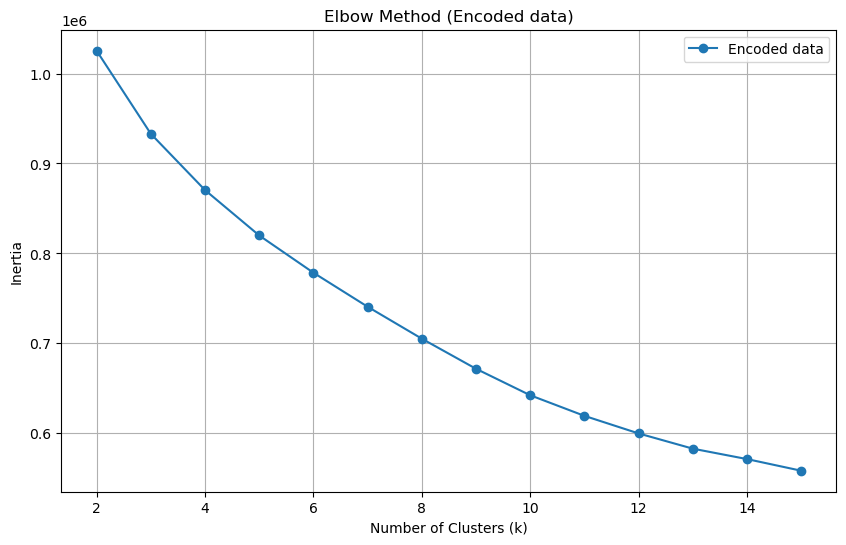

In [571]:
# Elbow method with encoded data
encoded_elbow = calculate_inertia(encoded_data, min_k=2, max_k=15)

# Visual plot
plt.figure(figsize=(10, 6))
plt.plot([k for k, _ in encoded_elbow], [inertia for _, inertia in encoded_elbow], marker='o', label="Encoded data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method (Encoded data)")
plt.grid(True)
plt.legend()

In [568]:
# Find silhouette scores for encoded data using DBSCAN
encoded_dbs = run_dbscan(encoded_data, eps_values, min_samples_values)
print("DBSCAN Results for encoded data:")
for eps, min_samples, n_clusters, score in encoded_dbs:
    print(f"EPS: {eps}, Min Samples: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {score}")

DBSCAN Results for encoded data:
EPS: 0.5, Min Samples: 3, Clusters: 296, Silhouette Score: -0.5155407786369324
EPS: 0.5, Min Samples: 5, Clusters: 46, Silhouette Score: -0.4376244843006134
EPS: 0.5, Min Samples: 10, Clusters: 1, Silhouette Score: None
EPS: 0.7, Min Samples: 3, Clusters: 482, Silhouette Score: -0.4486635625362396
EPS: 0.7, Min Samples: 5, Clusters: 130, Silhouette Score: -0.48854178190231323
EPS: 0.7, Min Samples: 10, Clusters: 7, Silhouette Score: -0.31181079149246216
EPS: 1.0, Min Samples: 3, Clusters: 722, Silhouette Score: -0.3243858218193054
EPS: 1.0, Min Samples: 5, Clusters: 233, Silhouette Score: -0.43232497572898865
EPS: 1.0, Min Samples: 10, Clusters: 39, Silhouette Score: -0.44028985500335693
EPS: 1.2, Min Samples: 3, Clusters: 868, Silhouette Score: -0.25547608733177185
EPS: 1.2, Min Samples: 5, Clusters: 302, Silhouette Score: -0.3929397463798523
EPS: 1.2, Min Samples: 10, Clusters: 68, Silhouette Score: -0.444803386926651


In [582]:
# DBSCAN consistently yielded -ve silhouette scores thus will use KMeans instead
# Encoder boosted performance significantly, thus will undergo hyperparameter tuning
from sklearn.model_selection import ParameterGrid

# Autoencoder Hyperparameter Tuning
param_grid = {
    'latent_dim': [3, 4, 5],
    'layer_units': [32, 64],
    'batch_size': [32, 64],
    'activation': ['relu', 'tanh']
}

best_loss = float('inf')
best_params = None
best_autoencoder = None

for params in ParameterGrid(param_grid):
    # Define the Autoencoder Model
    inputs = Input(shape=(df_mm.shape[1],))
    encoded = Dense(params['layer_units'], activation=params['activation'])(inputs)
    latent = Dense(params['latent_dim'], activation=params['activation'])(encoded)
    decoded = Dense(params['layer_units'], activation=params['activation'])(latent)
    outputs = Dense(df_mm.shape[1], activation='sigmoid')(decoded)

    autoencoder = Model(inputs, outputs)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the Autoencoder
    history = autoencoder.fit(
        df_mm, df_mm,
        epochs=50, batch_size=params['batch_size'],
        validation_split=0.2, verbose=0
    )

    val_loss = min(history.history['val_loss'])
    if val_loss < best_loss:
        best_loss = val_loss
        best_params = params
        best_autoencoder = autoencoder

print("Best Autoencoder Parameters:", best_params)

# Extract Latent Features
encoder = Model(inputs=best_autoencoder.input, outputs=best_autoencoder.get_layer(index=2).output)
latent_features = encoder.predict(df_mm)

Best Autoencoder Parameters: {'activation': 'relu', 'batch_size': 32, 'latent_dim': 5, 'layer_units': 64}
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


In [583]:
# Find silhouette scores for encoded data from tuned autoencoder
encoded_scoreop = find_silhouette_score(latent_features, min_k=2, max_k=15)

# Print results
print("Silhouette Scores for encoded data:")
for k, score in encoded_scoreop:
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

Silhouette Scores for encoded data:
Clusters: 2, Silhouette Score: 0.2347
Clusters: 3, Silhouette Score: 0.2359
Clusters: 4, Silhouette Score: 0.2263
Clusters: 5, Silhouette Score: 0.2225
Clusters: 6, Silhouette Score: 0.2322
Clusters: 7, Silhouette Score: 0.2398
Clusters: 8, Silhouette Score: 0.2340
Clusters: 9, Silhouette Score: 0.2384
Clusters: 10, Silhouette Score: 0.2449
Clusters: 11, Silhouette Score: 0.2452
Clusters: 12, Silhouette Score: 0.2351
Clusters: 13, Silhouette Score: 0.2341
Clusters: 14, Silhouette Score: 0.2388
Clusters: 15, Silhouette Score: 0.2335


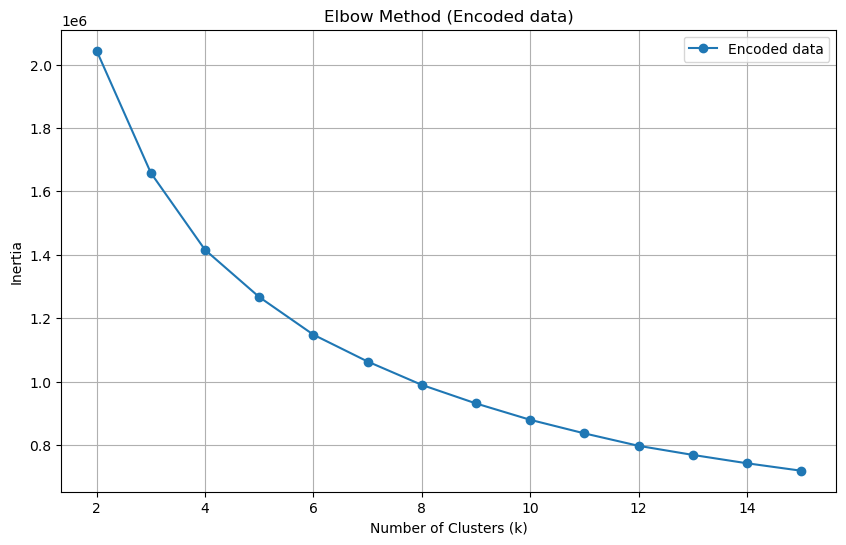

In [584]:
# Elbow method with encoded data from tuned autoencoder
encoded_elbowop = calculate_inertia(latent_features, min_k=2, max_k=15)

# Visual plot
plt.figure(figsize=(10, 6))
plt.plot([k for k, _ in encoded_elbowop], [inertia for _, inertia in encoded_elbowop], marker='o', label="Encoded data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method (Encoded data)")
plt.grid(True)
plt.legend()

### Fit KMeans with the cluster identified using autoencoder

In [ ]:
# k = 11 had highest silhouette score, will be chosen
# Fit KMeans to the latent features
kmeans = KMeans(n_clusters=11, random_state=0)  # Use the number of clusters determined from silhouette scores
kmeans_labels = kmeans.fit_predict(latent_features)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print cluster centers (in latent space)
print("Cluster Centers in Latent Space:")
print(cluster_centers)

Cluster Centers in Latent Space:
[[15.82912    5.5722694  7.1198044  9.936494   5.702836 ]
 [17.326311  12.648909  11.35215   23.896786  20.586948 ]
 [ 6.8759203  6.132987  10.931239   7.095695  18.423576 ]
 [22.235584   7.9918885 10.509921  15.834329   6.421534 ]
 [19.318497   6.7684827 13.69398   13.105486  14.080992 ]
 [13.962019   9.818782  19.53854   18.561733  12.094784 ]
 [25.141712  10.12108   10.670999  16.926455  26.112446 ]
 [19.930536  22.380154   5.1065097 10.512746  16.055565 ]
 [ 8.190004   7.4570246 13.143386  12.748253   8.946089 ]
 [15.581154  19.168787   9.53216    7.1751094  5.363654 ]
 [22.94225    5.1765165  5.6739707  9.427536  16.482319 ]]


In [597]:
# Add cluster labels to original data
df_mm['cluster'] = kmeans_labels

# Get detailed statistics for each cluster (mean, std, count, etc.)
cluster_stats = df_mm.groupby('cluster').describe()

# Print out the statistics
print("Detailed Cluster Statistics:")
print(cluster_stats)

Detailed Cluster Statistics:
        staff_pick                                              spotlight  \
             count      mean       std  min  25%  50%  75%  max     count   
cluster                                                                     
0           2502.0  0.068745  0.253071  0.0  0.0  0.0  0.0  1.0    2502.0   
1           1197.0  0.154553  0.361629  0.0  0.0  0.0  0.0  1.0    1197.0   
2           1951.0  0.174782  0.379878  0.0  0.0  0.0  0.0  1.0    1951.0   
3           1310.0  0.100763  0.301130  0.0  0.0  0.0  0.0  1.0    1310.0   
4           1409.0  0.210078  0.407508  0.0  0.0  0.0  0.0  1.0    1409.0   
5           1045.0  0.191388  0.393582  0.0  0.0  0.0  0.0  1.0    1045.0   
6            840.0  0.215476  0.411397  0.0  0.0  0.0  0.0  1.0     840.0   
7            266.0  0.015038  0.121932  0.0  0.0  0.0  0.0  1.0     266.0   
8           1232.0  0.116883  0.321411  0.0  0.0  0.0  0.0  1.0    1232.0   
9            666.0  0.019520  0.138446  0.0  0.

In [598]:
# Calculate success rate by cluster
success_rate_by_cluster = df_mm.groupby('cluster')['state_successful'].mean()

# Print the success rate for each cluster
print("Success Rate by Cluster:")
print(success_rate_by_cluster)


Success Rate by Cluster:
cluster
0     0.495604
1     0.634085
2     0.655049
3     0.470229
4     0.760114
5     0.659330
6     0.642857
7     0.000000
8     0.575487
9     0.000000
10    0.670829
Name: state_successful, dtype: float64


In [ ]:
# k=6, the point where silhouette score starts to rise
# Fit KMeans to the latent features (k=6 to compare difference in cluster means with k=11)
kmeans = KMeans(n_clusters=6, random_state=0)  # Use the number of clusters determined from silhouette scores
kmeans_labels = kmeans.fit_predict(latent_features)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print cluster centers (in latent space)
print("Cluster Centers in Latent Space:")
print(cluster_centers)

# Add cluster labels to original data
df_mm['cluster'] = kmeans_labels

# Get detailed statistics for each cluster (mean, std, count, etc.)
cluster_stats = df_mm.groupby('cluster').describe()

# Print out the statistics
print("Detailed Cluster Statistics:")
print(cluster_stats)

Cluster Centers in Latent Space:
[[15.938962   5.796547   7.9609456 10.52725    6.0685577]
 [20.806683  12.152916  11.420986  21.516726  22.612316 ]
 [ 6.7381306  6.650974  11.661027   8.266698  17.838345 ]
 [16.954268  19.789963   8.444759   7.9069314  7.740965 ]
 [23.190231   5.822423   7.5826707 10.849608  15.672453 ]
 [15.67437    8.711923  15.721419  16.96718    9.852764 ]]
Detailed Cluster Statistics:
        staff_pick                                              spotlight  \
             count      mean       std  min  25%  50%  75%  max     count   
cluster                                                                     
0           3377.0  0.071365  0.257472  0.0  0.0  0.0  0.0  1.0    3377.0   
1           1885.0  0.170292  0.375989  0.0  0.0  0.0  0.0  1.0    1885.0   
2           2553.0  0.173913  0.379109  0.0  0.0  0.0  0.0  1.0    2553.0   
3            899.0  0.021135  0.143913  0.0  0.0  0.0  0.0  1.0     899.0   
4           2774.0  0.197909  0.398495  0.0  0.0  

### Comparison of clustering without log transformation

In [601]:
##### Pre-processing
df = pd.read_excel('/Users/jiajue/Documents/McGill/Fall Term/INSY662/Assignment/Kickstarter_finalproject.xlsx')
df.dropna(inplace=True)

# Remove irrelevant/univariate columns
cols_to_drop = ['id', 'name', 'pledged', 'usd_pledged','name_len', 'blurb_len', 'state_changed_at', 'state_changed_at_weekday', 'created_at_weekday', 'deadline_day', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_day', 'launched_at_hr', 'disable_communication', 'staff_pick.1']

df.drop(cols_to_drop, axis=1, inplace=True)
df.info()

##### Drop rows with values other than 'successful' or 'failed'
df = df[df['state'].isin(['successful','failed'])]

##### Time features: Calculating campaign duration
df['campaign_dur'] = (df['deadline'] - df['launched_at']).dt.days

# Filter out obs with duration > 60 days, and ensuring that invalid data not retained
df = df[(df['campaign_dur']<=60) & (df['campaign_dur']>=0)] 

# Calculate duration between creation and launch
df['creation_to_launch'] = (df['launched_at'] - df['created_at']).dt.days

# Dropping original launched at and created at columns
df = df.drop(['launched_at', 'created_at', 'deadline'], axis=1)

##### Goal features: Scale goal to USD
df['goal_usd'] = df['goal'] * df['static_usd_rate']

# Creating new column avg goal per day
df['avg_goal_day'] = df['goal_usd']/df['campaign_dur']

# Drop original goal and pledged columns, along with static usd rate & currency
df = df.drop(['goal', 'static_usd_rate', 'currency'], axis=1)

#### Country
country_distribution = df['country'].value_counts()
threshold = len(df) * 0.01
country_replace = country_distribution[country_distribution < threshold].index
df['country'] = df['country'].replace(country_replace, 'Others')

#### Remove variables that were found to be collinear
df = df.drop(columns=['goal_usd', 'deadline_yr', 'deadline_month', 'created_at_yr'])

# set up variable for cols to dummify
cols_dummy = ['state', 'country', 'category', 'deadline_weekday','launched_at_weekday', 'launched_at_month', 'main_category']
df_dum = pd.get_dummies(df, columns=cols_dummy, drop_first=True)

# set up variable to standardise
cols_standardise = ['name_len_clean', 'blurb_len_clean', 'launched_at_yr', 'campaign_dur', 'creation_to_launch', 'avg_goal_day', 'backers_count']

# Minmax scaling
df_std = df_dum.copy()
mm = MinMaxScaler()
df_std[cols_standardise] = mm.fit_transform(df_std[cols_standardise])

# Transforming boolean values into 1 and 0
df_std = df_std.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<class 'pandas.core.frame.DataFrame'>
Index: 14937 entries, 0 to 15214
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   goal                 14937 non-null  int64         
 1   state                14937 non-null  object        
 2   country              14937 non-null  object        
 3   currency             14937 non-null  object        
 4   deadline             14937 non-null  datetime64[ns]
 5   created_at           14937 non-null  datetime64[ns]
 6   launched_at          14937 non-null  datetime64[ns]
 7   staff_pick           14937 non-null  bool          
 8   backers_count        14937 non-null  int64         
 9   static_usd_rate      14937 non-null  float64       
 10  category             14937 non-null  object        
 11  spotlight            14937 non-null  bool          
 12  name_len_clean       14937 non-null  int64         
 13  blurb_len_clean      14937 non-null 

/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_19656/750629847.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_std = df_std.applymap(lambda x: 1 if x is True else (0 if x is False else x))


### Clustering with kmeans

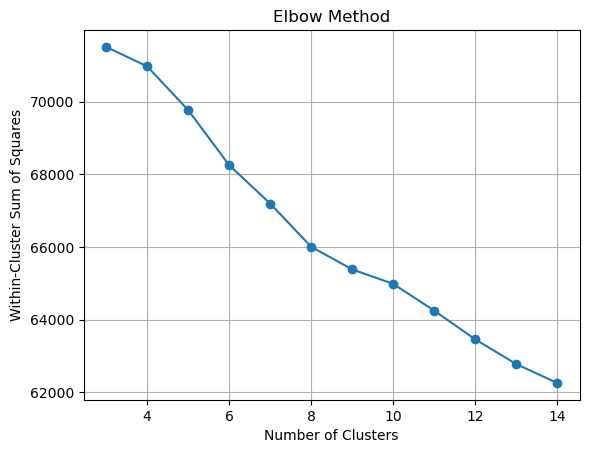

In [603]:
# Elbow
withins = []
for i in range(3,15):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0) # create kmeans clustering model with i clusters
    model = kmeans.fit(df_std) 
    withins.append(model.inertia_) # list of within cluster sum of squares ie how tightly packed data points are around their centroids


from matplotlib import pyplot as plt
plt.plot(range(3, 15), withins, marker='o')  # Match x range with clustering range
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.grid(True)
plt.show()

In [604]:
# Silhouette method
for i in range (3,15):    
    kmeans = KMeans(n_clusters=i, n_init='auto')
    model = kmeans.fit(df_std)
    labels = model.labels_
    print(i,':',silhouette_score(df_std,labels))

3 : 0.058784743115460114
4 : 0.059058340439796804
5 : 0.0487971355121806
6 : 0.04821648886531392
7 : 0.049458492459088774
8 : 0.049449844943467665
9 : 0.050882559586010255
10 : 0.04744184733723092
11 : 0.04298270460051805
12 : 0.052456420427749194
13 : 0.04795056235390953
14 : 0.049151320068073275


### Clustering with DBSCAN

In [605]:
eps_values = np.arange(2,10,1)
min_samples_values = [3, 4, 5]
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_std)
        if len(set(labels)) > 1:  # Avoid single-cluster results
            score = silhouette_score(df_std, labels)
            print(f"DBSCAN with eps={eps} and min_samples={min_samples} - Silhouette Score: {score}")

DBSCAN with eps=2 and min_samples=3 - Silhouette Score: -0.14046481652128967
DBSCAN with eps=2 and min_samples=4 - Silhouette Score: -0.11138799618829141
DBSCAN with eps=2 and min_samples=5 - Silhouette Score: -0.10254048945366977
